In [38]:
import matplotlib
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
import statsmodels.stats.weightstats as sw
from scipy import stats
import pickle
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Exploratory data analysis
* Get to know the domain
* Explore your data
* Clean your data
* Take a look and find connections between data

In [2]:
df = pd.read_csv("C:/Users/mahna/Ironhack/Careerhack/Tech_challenge/ironhack-data-analytics-challenge/data/measurements.csv")

In [3]:
df

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


In [4]:
df['gas_type'].value_counts()

SP98    228
E10     160
Name: gas_type, dtype: int64

In [5]:
df['refill liters'].value_counts()

45      2
37,7    2
39      2
37,6    1
38      1
38,3    1
10      1
41      1
37      1
37,2    1
Name: refill liters, dtype: int64

In [6]:
nulls_percent_df = pd.DataFrame(df.isna().sum()/len(df)).reset_index()
nulls_percent_df.columns = ['column_name', 'nulls_percentage']
nulls_percent_df

,column_name,nulls_percentage
0,distance,0.000000
1,consume,0.000000
2,speed,0.000000
3,temp_inside,0.030928
4,temp_outside,0.000000
5,specials,0.760309
6,gas_type,0.000000
7,AC,0.000000
8,rain,0.000000
9,sun,0.000000


#### The refill liters, refill gas and specials have more than 75% of null values. Therefore, I am dropping it.

In [7]:
data = df.drop(['refill gas', 'refill liters', 'specials'], axis=1)

In [8]:
data.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28,5,26,"21,5",12,E10,0,0,0
1,12,"4,2",30,"21,5",13,E10,0,0,0
2,"11,2","5,5",38,"21,5",15,E10,0,0,0
3,"12,9","3,9",36,"21,5",14,E10,0,0,0
4,"18,5","4,5",46,"21,5",15,E10,0,0,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   distance      388 non-null    object
 1   consume       388 non-null    object
 2   speed         388 non-null    int64 
 3   temp_inside   376 non-null    object
 4   temp_outside  388 non-null    int64 
 5   gas_type      388 non-null    object
 6   AC            388 non-null    int64 
 7   rain          388 non-null    int64 
 8   sun           388 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 27.4+ KB


Need to replace the commas and make them float numbers

In [10]:
data.columns

Index(['distance', 'consume', 'speed', 'temp_inside', 'temp_outside',
       'gas_type', 'AC', 'rain', 'sun'],
      dtype='object')

In [11]:
data["distance"]=data["distance"].str.replace(',', '.')
data["consume"]=data["consume"].str.replace(',', '.')
data["temp_inside"]=data["temp_inside"].str.replace(',', '.')

In [12]:
data["distance"]=data["distance"].astype(float)
data["consume"]=data["consume"].astype(float)
data["temp_inside"]=data["temp_inside"].astype(float)

In [13]:
data["temp_inside"]=data["temp_inside"].fillna(np.mean(data["temp_inside"]))

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   distance      388 non-null    float64
 1   consume       388 non-null    float64
 2   speed         388 non-null    int64  
 3   temp_inside   388 non-null    float64
 4   temp_outside  388 non-null    int64  
 5   gas_type      388 non-null    object 
 6   AC            388 non-null    int64  
 7   rain          388 non-null    int64  
 8   sun           388 non-null    int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 27.4+ KB


In [15]:
data

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28.0,5.0,26,21.5,12,E10,0,0,0
1,12.0,4.2,30,21.5,13,E10,0,0,0
2,11.2,5.5,38,21.5,15,E10,0,0,0
3,12.9,3.9,36,21.5,14,E10,0,0,0
4,18.5,4.5,46,21.5,15,E10,0,0,0
...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,SP98,0,0,0
384,16.1,4.3,38,25.0,31,SP98,1,0,0
385,16.0,3.8,45,25.0,19,SP98,0,0,0
386,15.4,4.6,42,25.0,31,SP98,1,0,0


# Visualization
Plot your data in a meaningful way

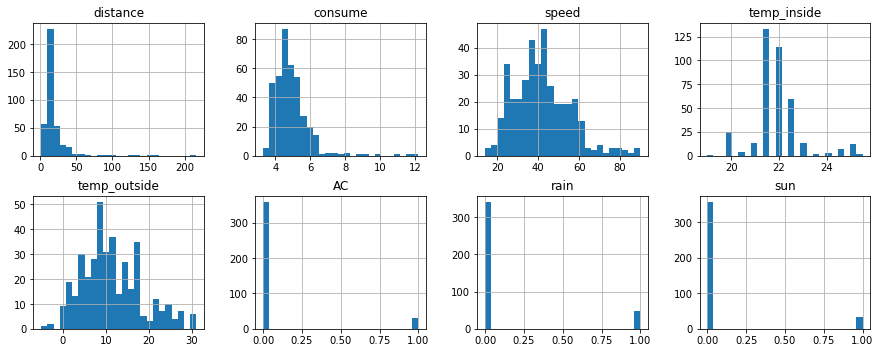

In [16]:
hist =data.hist(bins=25, layout=(4,4), figsize=(15,12))
plt.savefig("./histogram", transparent=True)

In [17]:
df1 = data[['distance', 'consume', 'speed', 'temp_inside', 'temp_outside', 'AC', 'rain', 'sun', 'gas_type']]

In [18]:
df1

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,gas_type
0,28.0,5.0,26,21.5,12,0,0,0,E10
1,12.0,4.2,30,21.5,13,0,0,0,E10
2,11.2,5.5,38,21.5,15,0,0,0,E10
3,12.9,3.9,36,21.5,14,0,0,0,E10
4,18.5,4.5,46,21.5,15,0,0,0,E10
...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,0,0,0,SP98
384,16.1,4.3,38,25.0,31,1,0,0,SP98
385,16.0,3.8,45,25.0,19,0,0,0,SP98
386,15.4,4.6,42,25.0,31,1,0,0,SP98


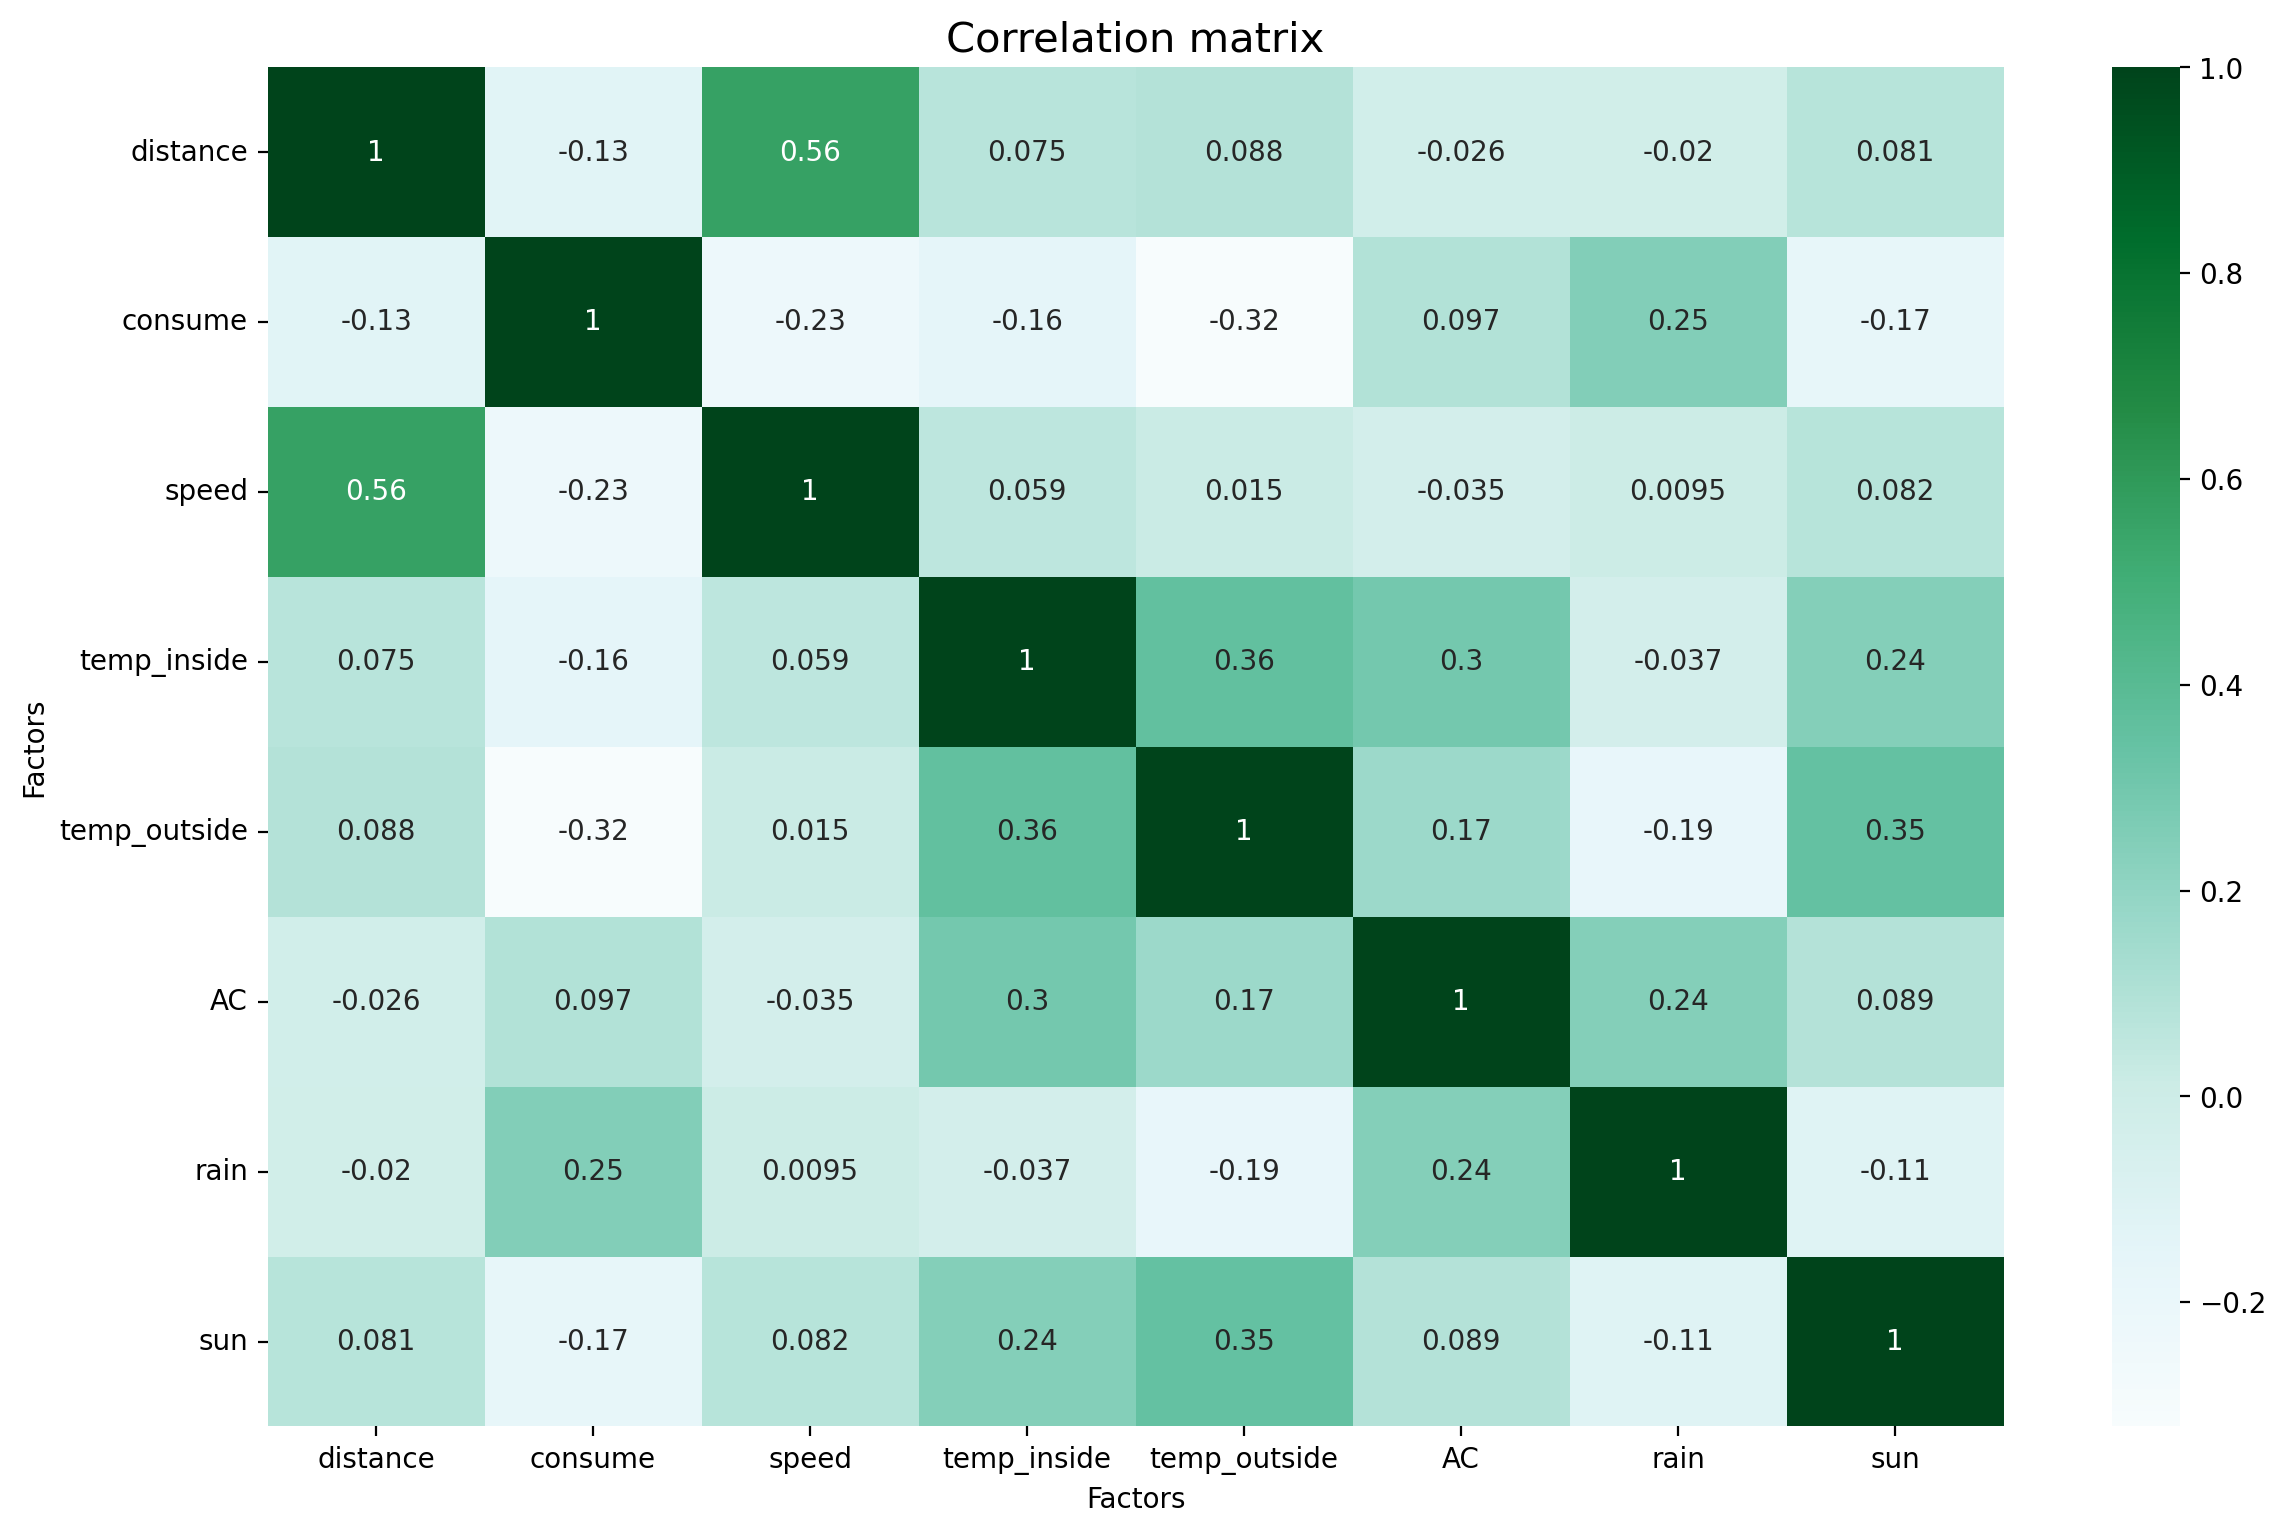

In [21]:
#Correlation matrix
fig, ax = plt.subplots(1, 1, figsize=(14, 9), dpi=200)
sns.heatmap(df1.corr(), annot=True,cmap='BuGn')
ax.set(xlabel='Factors')
ax.set(ylabel='Factors')

plt.title('Correlation matrix', fontsize = 15, c='black')
plt.show()
fig.savefig('./Corr_Factors.jpg', transparent = True)

The factors does not have much correlation among themselves. Speed and distance have some correlations whereas consumption is inversely related with distance, speed, temp_inside, temp_outside and sun.

# Predictions
Do you have any hypothesis?
Can you make any kind of prediction: regression and/or classification?

AB Test：Which is cheaper?
1.HYPOTHESIS: H0: E10 consume <= SP98 consume; H1: E10 consume > SP98 consume

2.METHOD: Z test & mannwhitney U TEST

Here, E10 is sold for 1,38€; SP98 is sold for 1,46€; per liter.

In [23]:
a=df1[df1["gas_type"]=="E10"].consume
b=df1[df1["gas_type"]=="SP98"].consume
print(stats.levene(a,b))
print(stats.shapiro(a))
print(stats.shapiro(b))
print(len(a),len(b))

LeveneResult(statistic=1.4896619839606222, pvalue=0.2230139845200356)
ShapiroResult(statistic=0.8245290517807007, pvalue=1.4005342025003031e-12)
ShapiroResult(statistic=0.7505877017974854, pvalue=2.784974847400685e-18)
160 228


As too much outliers exist, the shapiro test failed, mannwhitneyu is considered.

In [25]:
# Z test
print(sw.ztest(a,b,alternative="larger"))
# P_value:0.3816452423051032 is larger than 0.05, H1 is not supported.

(0.3011626300254617, 0.3816452423051032)


In [26]:
print(sw.ztest(a*1.38,b*1.46,alternative="smaller"))
# # P_value:0.01160724138852348 is less than 0.05, H1 is not supported, therefore E10 cost less.
# There is not enough evidence to confirm E10 consume more, but it indeed cheaper than SP98.

(-2.2698862964016047, 0.01160724138852348)


In [27]:
y = df1['gas_type'] #set y
X = df1.drop(['gas_type'], axis = 1) 
X

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun
0,28.0,5.0,26,21.5,12,0,0,0
1,12.0,4.2,30,21.5,13,0,0,0
2,11.2,5.5,38,21.5,15,0,0,0
3,12.9,3.9,36,21.5,14,0,0,0
4,18.5,4.5,46,21.5,15,0,0,0
...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,0,0,0
384,16.1,4.3,38,25.0,31,1,0,0
385,16.0,3.8,45,25.0,19,0,0,0
386,15.4,4.6,42,25.0,31,1,0,0


In [28]:
#train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state=0)

In [31]:
#apply StandardScaler()
transformer = StandardScaler()
transformer.fit(X_train)

with open("./standard_scaler.pkl", "wb") as file:
    pickle.dump(transformer, file)

X_train_scaled_np = transformer.transform(X_train)
X_train_scaled_df = pd.DataFrame(X_train_scaled_np, columns=X_train.columns, index=X_train.index)
# because this is the only tranformation we apply to the numerics, (there are no categorical features in the df)
# we can immediately transform the X_test as well
X_test_scaled_np = transformer.transform(X_test)
X_test_scaled_df = pd.DataFrame(X_test_scaled_np , columns=X_test.columns, index=X_test.index)
X_train_scaled_df.head()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun
287,0.508735,-1.037596,-0.507085,0.063828,0.500266,-0.308879,-0.390405,3.452053
56,-0.372807,0.020479,-1.339611,-0.427540,-0.631722,-0.308879,-0.390405,-0.289683
8,-0.730609,1.607591,-1.188243,-0.427540,-1.056218,-0.308879,-0.390405,-0.289683
313,-0.398735,-0.614366,-0.280032,0.063828,0.783263,-0.308879,-0.390405,-0.289683
134,-0.766908,1.184361,-1.188243,-0.427540,-0.914719,-0.308879,-0.390405,-0.289683


## Base Model : Logistic Regression

In [34]:
lr = LogisticRegression(random_state=0, solver='liblinear', multi_class='ovr').fit(X_train_scaled_df, y_train)

with open("./logistic_model_liblinear_ovr.pkl", "wb") as file:
    pickle.dump(lr, file)


In [35]:
print("The accuracy of the model in the TEST set is: {:.2f}".format(lr.score(X_test_scaled_df, y_test)))

The accuracy of the model in the TEST set is: 0.56


Logistic Regression would not be a good predictor

## Models Automation

In [40]:
def models_automation(models, X_tr, y_tr,X_te, y_te):
    for name, model in models:
        model.fit(X_tr, y_tr)
        print("Training model: ", name)
        print(f"{model.__class__.__name__}: Train -> {model.score(X_tr, y_tr)}, Test -> {model.score(X_te, y_te)}")
        model_path = "." + name + ".pkl"
        with open(model_path, "wb") as file:
            pickle.dump(model, file)

In [41]:
# model automation: with scaling data
model_list = [("KNN_model",KNeighborsClassifier()), 
              ("DT_model",DecisionTreeClassifier()),
              ("RF_model",RandomForestClassifier())]
models_automation(model_list, X_train_scaled_np, y_train, X_test_scaled_np, y_test)

Training model:  KNN_model
KNeighborsClassifier: Train -> 0.7354838709677419, Test -> 0.6666666666666666
Training model:  DT_model
DecisionTreeClassifier: Train -> 1.0, Test -> 0.6410256410256411
Training model:  RF_model
RandomForestClassifier: Train -> 1.0, Test -> 0.5897435897435898


# Storytelling
What metrics are you obtaining?
Explain your conclusions
Shape your new data and conclusions in such a way that is appealing to the listener and tells a story

The accuracy score has been obtained here. The accuracy score shows that there is over fitting problem in Decision Tree and Random Forest Classifier. Best parameters can be found With elbow method for KNeighboursClassifier and Grid Search CV for Decision Tree and Random Forest.

# Database
Load the processed information into a database

In [43]:
clean = df1.to_csv("./clean.csv", index=False)